In [7]:
# 计算特定副本中各个门派的DPS。
# 与之前的版本不同，每个不同的玩家只会计算一次。

import numpy as np
import pymysql
import configparser
import json
import time
import matplotlib.pyplot as plt

In [13]:
ip = "139.199.102.41"
config = configparser.RawConfigParser()
config.readfp(open('../settings.cfg'))

dbname = config.get('jx3bla', 'username')
dbpwd = config.get('jx3bla', 'password')
db = pymysql.connect(host=ip,user=dbname,password=dbpwd,database="jx3bla",port=3306,charset='utf8')
cursor = db.cursor()

C:\Users\jinhao\AppData\Local\Temp/ipykernel_25764/2612104811.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.
  config.readfp(open('../settings.cfg'))


In [21]:
edition = "5.1.0"
mapdetail = "25人普通雷域大泽"

sql = """SELECT * FROM HighestDps WHERE map='%s'"""%mapdetail
cursor.execute(sql)
result = cursor.fetchall()

In [26]:
edition = "5.1.0"
mapdetail = "25人英雄雷域大泽"

sql = """SELECT * FROM HighestDps WHERE map='%s'"""%mapdetail
cursor.execute(sql)
result = cursor.fetchall()

In [14]:
edition = "5.1.0"
mapdetail = "25人(普通,英雄)雷域大泽"

sql = """SELECT * FROM HighestDps WHERE map='25人普通雷域大泽' or map='25人英雄雷域大泽'"""
cursor.execute(sql)
result = cursor.fetchall()

In [22]:
print(result[0:10])

(('山雨欲来', '抓鸭高手', '3', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '小水苏', '212', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '佰壹小时候', '3', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '橘络', '9', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '卢锅巴', '1', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '方砚寒', '212', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '楼二二二二', '4', '25人普通雷域大泽', '未知目标', 2, 0), ('山雨欲来', '药盾', '21', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '黄老邪', '6', '25人普通雷域大泽', '未知目标', 1, 0), ('山雨欲来', '初辞', '5', '25人普通雷域大泽', '未知目标', 1, 0))


In [27]:
bossDict = {}

for line in result:
    if line[4] not in bossDict:
        bossDict[line[4]] = []
    if line[2] in ["1", "2", "3", "4", "5", "6", "7", "10", "21", "22"]:
        continue
    bossDict[line[4]].append([line[1], line[2], line[6]])

In [17]:
print(bossDict.keys())

dict_keys(['', '月泉淮', '悉达罗摩', '乌蒙贵', '巨型尖吻凤', '尤珈罗摩', '蜘蛛', '桑乔', '未知目标', 'EXPGameJX3', '孤家寡喵', '念经的渡空离'])


In [28]:
def getColor(occ, light = 0):
    if occ[-1] in ['d', 't', 'h', 'p', 'm']:
        occ = occ[:-1]
    colorDict = {"0": (0, 0, 0), 
                 "1": (210, 180, 0),#少林
                 "2": (127, 31, 223),#万花
                 "4": (56, 175, 255),#纯阳
                 "5": (255, 127, 255),#七秀
                 "3": (160, 0, 0),#天策
                 "8": (255, 255, 0),#藏剑
                 "9": (205, 133, 63),#丐帮
                 "10": (253, 84, 0),#明教
                 "6": (63, 31, 159),#五毒
                 "7": (0, 133, 144),#唐门
                 "21": (180, 60, 0),#苍云
                 "22": (100, 250, 180),#长歌
                 "23": (71, 73, 166),#霸刀
                 "24": (195, 171, 227),#蓬莱
                 "25": (161, 9, 34),#凌雪
                 "211": (166, 83, 251),#衍天
                 "212": (0, 172, 153),#药宗
                }
    if occ not in colorDict:
        occ = "0"
    a = colorDict[occ][0]/255
    b = colorDict[occ][1]/255
    c = colorDict[occ][2]/255
    if light == 1:
        a = (a + 1) / 2
        b = (b + 1) / 2
        c = (c + 1) / 2
    elif light == 2:
        n = a + b + c
        if n < 1.5:
            return (1, 1, 1)
        else:
            return (0, 0, 0)
    return (a, b, c)

20657.625


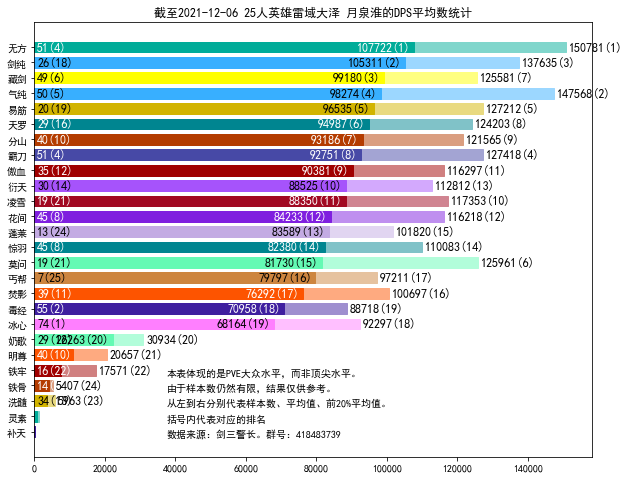

145487.72727272726


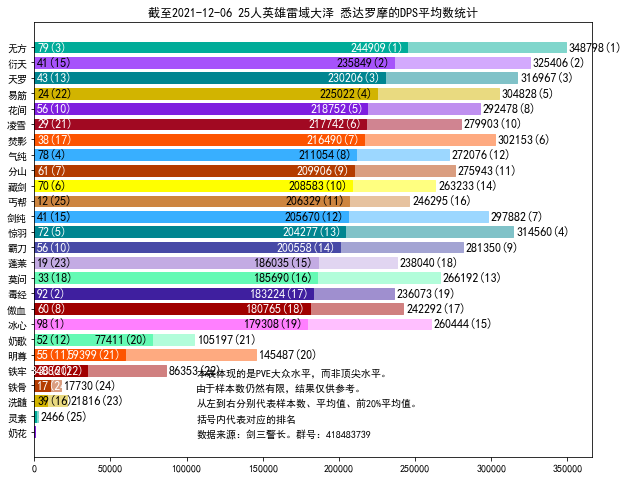

12180.0


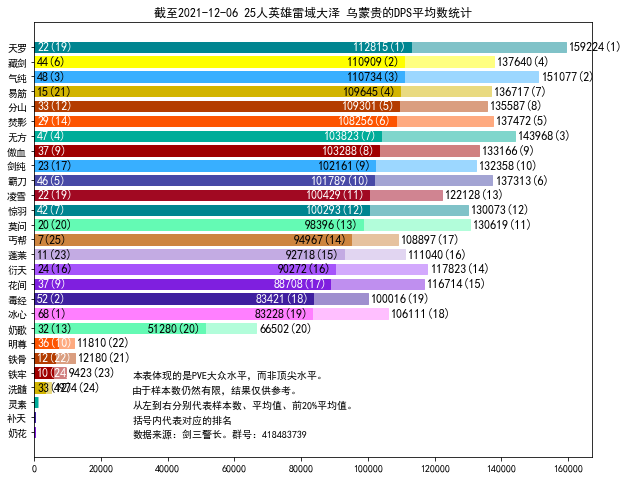

68816.6


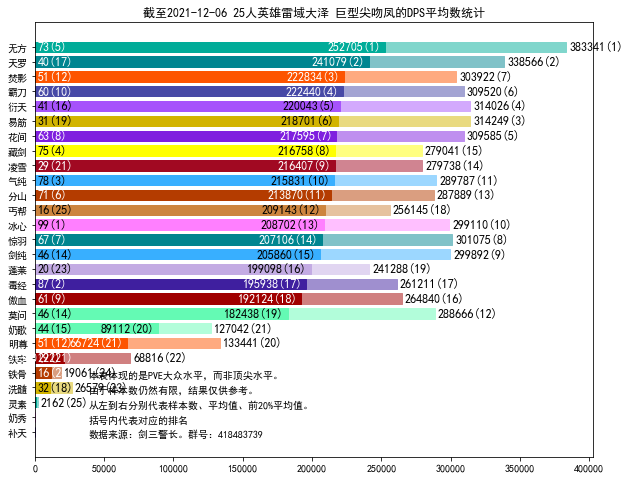

68858.5


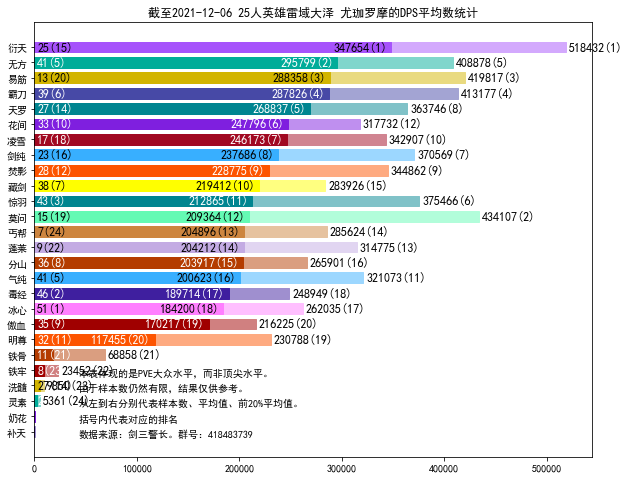

116165.33333333333


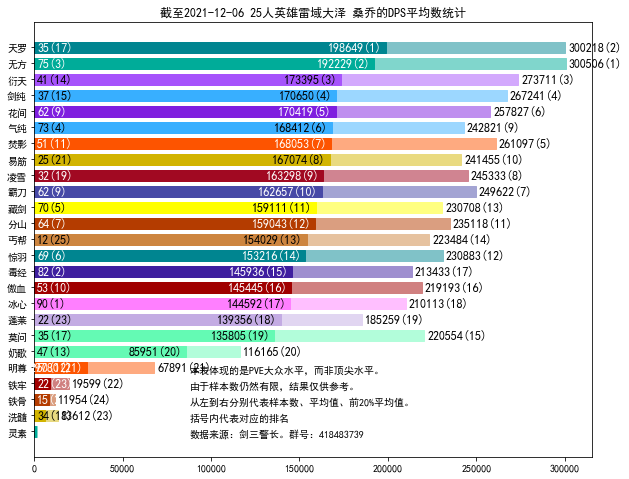

In [29]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
          "提多罗吒": 2,
          "巨型尖吻凤": 2,
          "桑乔": 2,
          "悉达罗摩": 2,
          "尤珈罗摩": 2,
          "月泉淮": 2,
          "乌蒙贵": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
     "212d": "无方",
     "212h": "灵素",
}

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        # DPSpos[name] = 2
        continue
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 100:
            occDict[line[1]].append(line[DPSpos[name]])
            num += 1
    table = []
    for occ in occDict:
        if len(occDict[occ]) > 0 and occ not in ['3', '7']:
            modifiedList = []
            if occ == "3d":
                for x in occDict[occ]:
                    if x > 20000:
                        modifiedList.append(x)
                data = np.array(modifiedList)
            else:
                modifiedList = occDict[occ]
                data = np.array(occDict[occ])
            modifiedList.sort(key = lambda x:-x)
            num = len(modifiedList) // 5
            if num == 0:
                num = 1
            dataTop10 = modifiedList[:num]
            dataTop10Np = np.array(dataTop10)
            res = [occ, occName[occ], data.shape[0], np.mean(data), np.median(data), np.max(data), np.min(data), np.mean(dataTop10Np)]
            table.append(res)
    table.sort(key = lambda x: x[3])
    #print("%s的面板DPS统计，样本数：%d"%(name, num))
    #for line in table:
    #    print(line)
        
    X = []
    Y = []
    C = []
    N = []
    Y2 = []
    C2 = []
    C3 = []
    plt.figure(figsize=(10,8))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    for line in table:
        X.append(line[1])
        Y.append(line[3])
        C.append(getColor(line[0], 0))
        N.append(line[2])
        Y2.append(line[7])
        C2.append(getColor(line[0], 1))
        C3.append(getColor(line[0], 2))
    barlist2 = plt.barh(X, Y2, height=0.7)
    barlist = plt.barh(X, Y, height=0.7)
    
    YR = []
    Y2R = []
    NR = []
    for i in range(len(Y)):
        n = 0
        for j in range(len(Y)):
            if Y[j] >= Y[i]:
                n += 1
        YR.append(n)
    for i in range(len(Y2)):
        n = 0
        for j in range(len(Y2)):
            if Y2[j] >= Y2[i]:
                n += 1
        Y2R.append(n)
    for i in range(len(N)):
        n = 0
        for j in range(len(N)):
            if N[j] >= N[i]:
                n += 1
        NR.append(n)
        
    for i in range(len(X)):
        barlist[i].set_color(C[i])
        barlist2[i].set_color(C2[i])
        if (Y[i] > 1000):
            plt.annotate("%d(%d)"%(N[i], NR[i]),  
            #(barlist[i].get_width(), barlist[i].get_y() + barlist[i].get_height()/2), ha = 'center', va = 'center', xytext = (10, 0), 
            (0, barlist[i].get_y() + barlist[i].get_height()/2), ha = 'left', va = 'center', xytext = (3, 0), 
            textcoords = 'offset points', fontsize = 12, color = C3[i])
        
        if (Y[i] > 1000):
            plt.annotate("%d(%d)"%(int(Y2[i]), Y2R[i]),  
            (barlist2[i].get_width(), barlist2[i].get_y() + barlist2[i].get_height()/2), ha = 'left', va = 'center', xytext = (3, 0), 
            textcoords = 'offset points', fontsize = 12, color = 'black')
        
        if (Y[i] > 20000):
            plt.annotate("%d(%d)"%(int(Y[i]), YR[i]),    
            (barlist[i].get_width(), barlist[i].get_y() + barlist[i].get_height()/2), ha = 'right', va = 'center', xytext = (-3, 0), 
            textcoords = 'offset points', fontsize = 12, color = C3[i])
    print(barlist2[5].get_width())
    plt.annotate("本表体现的是PVE大众水平，而非顶尖水平。", (barlist2[4].get_width() + 20000, barlist[4].get_y()))
    plt.annotate("由于样本数仍然有限，结果仅供参考。", (barlist2[4].get_width() + 20000, barlist[3].get_y()))
    plt.annotate("从左到右分别代表样本数、平均值、前20%平均值。", (barlist2[4].get_width() + 20000, barlist[2].get_y()))
    plt.annotate("括号内代表对应的排名", (barlist2[4].get_width() + 20000, barlist[1].get_y()))
    plt.annotate("数据来源：剑三警长。群号：418483739", (barlist2[4].get_width() + 20000, barlist[0].get_y()))
        
    bossID = {"巨型尖吻凤": 1,
          "桑乔": 2,
          "悉达罗摩": 3,
          "尤珈罗摩": 4,
          "月泉淮": 5,
          "乌蒙贵": 6,}[name]
    plt.title('截至2021-12-06 %s %s的DPS平均数统计'%(mapdetail, name))
    plt.savefig("yx%d.png"%bossID)
    plt.show()

In [28]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
}

resultDict = {}

sql = """DELETE FROM DpsStat WHERE mapdetail = "%s";"""%(
    mapdetail)
cursor.execute(sql)

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        DPSpos[name] = 2
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 5000:
            if name == "安小逢":
                occDict[line[1]].append(line[2:9])
            else:
                occDict[line[1]].append(line[2:3])
            num += 1
    table = []
    for occ in occDict:
        if occ in occName:
            if len(occDict[occ]) > 0:
                data = np.array(occDict[occ], dtype = 'int32')
                res = [occ, occName[occ], data.shape[0]] +  list(np.mean(data, axis = 0))
                table.append(res)
                resultDict[occ] = res[1:]
     
    J = json.dumps(resultDict).replace('"', "'")
    sql = """INSERT INTO DpsStat VALUES ("%s", "%s", "%s")"""%(
        mapdetail, name, J)
    cursor.execute(sql)
    db.commit()
            
    table.sort(key = lambda x: -x[3])
    print("%s的面板DPS统计，样本数：%d"%(name, num))
    print(resultDict)


猿飞的面板DPS统计，样本数：4485
{'2d': ['花间', 194, 63968.56701030928], '24': ['蓬莱', 159, 70436.48427672956], '3d': ['傲血', 253, 56939.391304347824], '7m': ['天罗', 94, 78139.58510638298], '4m': ['气纯', 259, 70662.71814671815], '21d': ['分山', 239, 70838.62343096234], '25': ['凌雪', 141, 71474.99290780142], '3t': ['铁牢', 31, 9124.290322580646], '6d': ['毒经', 544, 65267.04044117647], '10d': ['焚影', 226, 65634.19469026549], '10t': ['明尊', 174, 10727.103448275862], '211': ['衍天', 326, 76631.56441717791], '22h': ['奶歌', 206, 41344.73300970874], '1d': ['易筋', 161, 62630.875776397515], '5d': ['冰心', 377, 58106.80371352785], '8': ['藏剑', 258, 65224.9496124031], '7p': ['惊羽', 293, 68879.13993174062], '23': ['霸刀', 205, 64560.13658536586], '4p': ['剑纯', 140, 70492.20714285714], '9': ['丐帮', 89, 66757.23595505618], '22d': ['莫问', 105, 72306.64761904762], '1t': ['洗髓', 7, 5982.857142857143], '21t': ['铁骨', 4, 22037.25]}
宓桃的面板DPS统计，样本数：5430
{'2d': ['花间', 224, 110310.08035714286], '24': ['蓬莱', 172, 102843.56976744186], '3d': ['傲血', 34